In [1]:
### do our imports
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import nibabel as nib
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
#### define nifti data loader class
class niftis_loader(Dataset):
    """Load a list of registered T1 and T2 volumes"""
    def __init__(self,nifti1,nifti2,transform=None):
        """
        Args:
            nifti1: list of nifti images for first modality
            nifti2: list of nifti images for second modality
            transform: Optional transform to be applied to sample
        """
        ### define the variables from the input here
        self.nifti1=[line.strip() for line in open(nifti1, 'r')]
        self.nifti2=[line.strip() for line in open(nifti2, 'r')]
        self.transform=transform

    def __len__(self):
        return len(self.nifti2)
    
    ### 
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        #### load the niftis
        img1=nib.load(self.nifti1[idx]).get_data().astype(float)
        img2=nib.load(self.nifti2[idx]).get_data().astype(float)

        sample = {'nii1': img1, 'nii2': img2}
        
        if self.transform:
            sample = self.transform(sample)

        return sample
        
        
        
#     #     ### load nifti data array
#     def load_nifti(nii_path):
#         img=nib.load(nii_path,mmap=False)
#         img=img.get_data().astype(float)
#         return img
            
            
    

In [8]:
!ls hcp-openaccess-t1t2/HCP1200/T1s.txt

hcp-openaccess-t1t2/HCP1200/T1s.txt


In [12]:
test_dataset = niftis_loader(nifti1='T1s.txt',nifti2='T2s.txt')


0 (260, 311, 260) (260, 311, 260)
1 (260, 311, 260) (260, 311, 260)
2 (260, 311, 260) (260, 311, 260)
3 (260, 311, 260) (260, 311, 260)


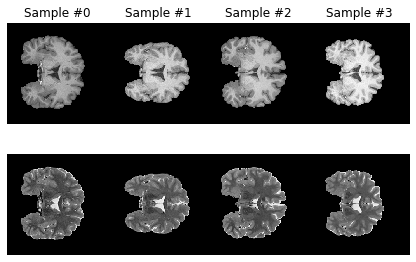

In [13]:
for i in range(len(test_dataset)):
    sample = test_dataset[i]
    
    print(i, sample['nii1'].shape, sample['nii2'].shape)
    ax1 = plt.subplot(2, 4, i + 1)
    plt.tight_layout()
    ax1.set_title('Sample #{}'.format(i))
    ax1.axis('off')
    plt.imshow(sample['nii1'][:,180,:],cmap='Greys_r')
    ax1 = plt.subplot(2, 4, i + 5)
    ax1.axis('off')
    plt.imshow(sample['nii2'][:,180,:],cmap='Greys_r')
    plt.subplots_adjust(wspace=0, hspace=0)
    
    if i == 3:
        plt.show()
        break

